
# Telecom Churn Model

In this notebook we are going to build a predictive classification model for prediction customer churn using Telecom data.


# Set Up
Import required libraries

In [1]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
!pip install boruta
from boruta import BorutaPy 

from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# Evaluation
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

In [2]:
# Set timer 
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

In [4]:
np.random.seed(42)

# Exploratory Data Analysis

In [5]:
print(os.path.abspath(os.getcwd()))

# Read data
data = pd.read_csv('Downloads/telecom-customer/Telecom_customer churn.csv')

# Count rows & columns
print(data.shape)

(100000, 100)


In [6]:
# Get first rows
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [7]:
# Get last rows 
data.tail()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.0,1,25,1,1,U,B,N,3771,9534.0,1594.83,1561.14,9494.0,3751,74.34,452.10,178.62,410,121,73,603.0,159.0,100.0,U,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,15.0,S,M,5.0,M,4.0,2.0,NaN,A,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.0,0,27,1,1,U,CY,Y,3675,8887.0,1517.10,1451.85,8805.0,3629,72.59,440.25,181.45,382,126,73,410.0,143.0,69.0,S,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,9.0,S,M,3.0,M,7.0,2.0,I,A,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,31,1,1,U,DA,N,1271,9336.0,1114.91,1055.93,9234.0,1238,55.58,486.00,65.16,662,85,61,712.0,88.0,72.0,U,SOUTHWEST AREA,Y,N,199.98999,2.0,2.0,WCMB,0.0,0.0,NaN,NaN,NaN,B,1.0,M,9.0,NaN,NaN,NaN,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.666667,0.0,0.666667,0.0,117.333333,0.0,550.666667,0.333333,327.000000,0.0,417.000000,0.333333,1.333333,1.333333,0.106667,235.333333,1.000000,564.233333,1.656667,330.890000,55.000000,62.896667,16.666667,32.883333,442.333333,0.333333,641.230000,1.656667,167.333333,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.0,0,25,1,1,U,EA,N,10082,20784.0,2669.20,2593.26,20488.0,9921,123.49,975.62,472.43,1031,450,148,943.0,433.0,165.0,U,SOUTHWEST AREA,Y,N,149.98999,7.0,5.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,S,U,U,U,U,U,N,75.0,1099999
99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666667,0.0,0.666667,0.0,19.333333,0.0,155.666667,0.000000,1.333333,0.0,130.000000,0.000000,0.666667,0.666667,0.183333,1.333333,3.666667,164.436667,0.000000,0.000000,4.666667,7.110000,0.000000,0.000000,99.000000,0.000000,133.690000,0.000000,32.333333,0.0,30.746667,0.0,6.333333,155.666667,130.000000,0.0,0.0,1,25,1,1,U,B,N,1303,2355.0,956.47,885.94,2225.0,1231,46.63,117.11,64.79,105,60,51,111.0,64.0,51.0,S,LOS ANGELES AREA,Y,N,149.98999,3.0,2.0,WCMB,0.0,0.0,NaN,2.0,S,A,2.0,M,4.0,NaN,NaN,A,0.0,H,U,U,U,U,U,N,5.0,1100000


In [8]:
# Descriptive Statistics
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,99109.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97161.000000,97161.000000,97161.000000,99153.000000,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,-1.021067,5.955085,0.040520,4.022917,0.025777,27.784905,0.029810,144.881677,0.870548,55.085152,0.047590,108.892535,0.774442,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,1.844036,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.358162,174.080788,0.707832,66.003498,0.416283,165.280703,1.135804,10.044298,145.752225,109.666977,0.011700,1.782928,0.495620,18.833990,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111529,7546.314699,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,509.634576,178.365157,58.683618,101.875763,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,50.363209,8.954715,0.877136,10.672202,1.490255,38.358734,0.496970,158.267711,9.053901,86.841198,2.127422,118.580079,8.129844,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,23.733226,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,4.065630,207.673553,8.410151,91.456885,4.652627,237.332918,17.768683,15.418406,159.348094,119.594305,0.547470,5.353953,0.499983,9.655794,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,496.663453,182.724565,40.758577,61.005671,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000276E7E01D88>,
      dtype=object)

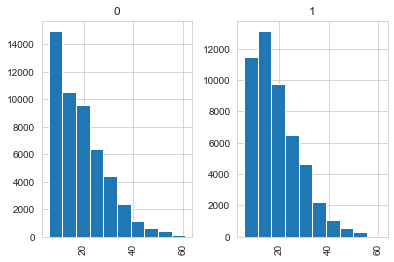

In [9]:
# Check for example, difference in tenure (months) between churners and non-churners
data['months'].hist(by=data.churn)

In [ ]:
##########################
### GENERATE INSIGHTS ###
##########################

# Data Preparation

***Tweak/create new variables***

In [10]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.ix[0] == "Y" or x.ix[1] == "Y" or x.ix[2] == "Y") else "N",axis=1)
data["preteen"] = preteen
data.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.ix[0] == "Y" or x.ix[1] == "Y") else "N",axis=1)
data["teen"] = teen
data.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

In [11]:
# Create new variables
data["CDR_data"] = data["drop_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_data"] = data["comp_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_voice"] = data["comp_vce_Mean"]/data["plcd_vce_Mean"]

***Handle categorical variables***

In [12]:
# Let's check all non-numeric fields.
data.columns[data.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'preteen', 'teen'], dtype='object')

In [13]:
# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

In [14]:
# Check nominal categorical summaries
data[categ_nominal].describe()

,new_cell,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,preteen,teen,creditcd
count,100000,100000,92612,99960,99999,99999,89811,66294,68091,98268,77921,62077,61692,98268,100000,100000,98268
unique,3,2,5,19,4,2,3,2,2,5,2,6,15,17,2,2,2
top,U,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,U,M,C,A,N,N,N,Y
freq,66914,86064,32097,11098,72265,85593,75733,64284,48759,37333,77697,39124,47205,33389,86993,85251,67234


In [15]:
# Check nominal categorical summaries
data[categ_ordinal_ordered].describe()

,crclscod
count,100000
unique,54
top,AA
freq,36509


All these categorical variables contain string, we need to convert those.

In [16]:
# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data = pd.concat([data,
                      pd.get_dummies(data[i],
                                     prefix=i,
                                     dummy_na=True)],
                     sort=False,
                     axis=1)
    
print(data.shape) 

(100000, 210)


In [17]:
# Remove the categorical variables
data = data.drop(categ_nominal,
                  axis=1)
print(data.shape)

(100000, 193)


In [18]:
# Order this as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data[i] = data[i].map(s_a_dict)

In [19]:
# Remove all rare categorical variables
toremove = ['dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','teen_N','preteen_N']

# Remove the categorical variables
data = data.drop(toremove,axis=1)
print(data.shape)

(100000, 141)


***Handle Missing Values***

In [20]:
# Check Null values
data.isnull().sum()

rev_Mean                            357
mou_Mean                            357
totmrc_Mean                         357
da_Mean                             357
ovrmou_Mean                         357
ovrrev_Mean                         357
vceovr_Mean                         357
datovr_Mean                         357
roam_Mean                           357
change_mou                          891
change_rev                          891
drop_vce_Mean                         0
drop_dat_Mean                         0
blck_vce_Mean                         0
blck_dat_Mean                         0
unan_vce_Mean                         0
unan_dat_Mean                         0
plcd_vce_Mean                         0
plcd_dat_Mean                         0
recv_vce_Mean                         0
recv_sms_Mean                         0
comp_vce_Mean                         0
comp_dat_Mean                         0
custcare_Mean                         0
ccrndmou_Mean                         0


In [21]:
# Remove variables with over 20% missing 
data = data.drop(['numbcars','lor','income','adults'],axis=1)
print(data.shape)

(100000, 137)


In [22]:
# Replace all other missing values with the median 
data = data.fillna(value=data.median())

***Seperate X from Y***

In [23]:
# Set target
target=['churn']

# Remove ID
data = data.drop(['Customer_ID'],axis=1)

# Set X and Y (features and target)
x = data[data.columns.difference(target)]
y = data[target]

***Scale Features***

In [24]:
# Scale
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Transform back to Dataframe with column names
x = pd.DataFrame(x)
x.columns = list(data[data.columns.difference(target)])

# Modeling

### Data Splitting

In [25]:
# Split data 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 135)
(20000, 135)
(80000, 1)
(20000, 1)


### Feature Selection

In [ ]:
########################
### INSERT CODE HERE ###
########################

In [37]:
# Overwrite our current data with selected features
finalfeatures = ['eqpdays','change_mou','months','change_rev','avgrev','avgqty','avgmou','rev_Mean','adjqty','totmou','CSSR_voice','mou_peav_Mean','totmrc_Mean','drop_vce_Mean','blck_vce_Mean','mou_pead_Mean']
x_train_final = x_train[finalfeatures]
x_test_final = x_test[finalfeatures]

### Eveluation Metrics

We will use the following evaluation metrics:
        - AUC
        - Accuracy
        - Precision
        - Recall

In [38]:
# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

### Model Selection

In [39]:
##########################
### COMPLETE THE BELOW ###
##########################

# Model
_______ = _______() #solver

# Score
_______ = cross_validate(_______, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
_______ = (_______['test_roc_auc']).mean().round(3)
_______ = (_______['test_accuracy']).mean().round(3)
_______ = (_______['test_precision']).mean().round(3)
_______ = (_______['test_recall']).mean().round(3)

In [ ]:
##########################
### COMPLETE THE BELOW ###
##########################

# Model
_______ = _______() #solver

# Score
_______ = cross_validate(_______, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
_______ = (_______['test_roc_auc']).mean().round(3)
_______ = (_______['test_accuracy']).mean().round(3)
_______ = (_______['test_precision']).mean().round(3)
_______ = (_______['test_recall']).mean().round(3)

In [ ]:
##########################
### COMPLETE THE BELOW ###
##########################

# Model
_______ = _______() #solver

# Score
_______ = cross_validate(_______, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
_______ = (_______['test_roc_auc']).mean().round(3)
_______ = (_______['test_accuracy']).mean().round(3)
_______ = (_______['test_precision']).mean().round(3)
_______ = (_______['test_recall']).mean().round(3)

### Fine-tuning

In [ ]:
##########################
####### OPTIONAl #########
##########################

In [42]:
# Check model outputs so far
models = [('_______', _____, _____, _____, _____),   
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Logistic Regression (train),0.589,0.564,0.564,0.517
1,Random Forest Regression (train),0.657,0.610,0.603,0.623
2,XG Boost Regressor (train),0.657,0.611,0.605,0.618


# Evaluation

Final evaluation on test data

In [54]:
##########################
### COMPLETE THE BELOW ###
##########################


# Use final model to predict on test set
y_pred = _______.predict(x_test_final)

In [55]:
confusion_matrix(y_test,y_pred)

array([[6017, 4004],
       [3611, 6368]], dtype=int64)

In [ ]:
# Add to outputs
models = [('', roc_auc_score(y_test, y_pred).round(3),
           accuracy_score(y_test, y_pred).round(3),
           precision_score(y_test, y_pred).round(3),
           recall_score(y_test, y_pred).round(3))
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

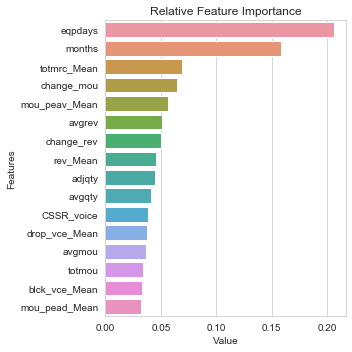

In [57]:
##########################
### COMPLETE THE BELOW ###
##########################


# Visualising feature importance as per the fine tuned RFR fitting result

# Get Feature Importance and sort
col = list(finalfeatures)
sorted(zip(_____.feature_importances_,col),reverse=True)

# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create DataFrame
feature_imp = pd.DataFrame(sorted(zip(_____.feature_importances_,col)), columns=['Value','Features'])

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Relative Feature Importance')
plt.tight_layout()
plt.show()